In [9]:
#!pip install wordcloud

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Sample text
documents = [
    "The quick brown fox jumped over the lazy dog.",
    "The dog slept under the tree.",
    "Foxes are quicker than dogs."
]

documents = [
    "In astronomy, the Big Bang is the prevailing cosmological model explaining the existence of the observable universe from the earliest known periods through its subsequent large-scale evolution.",
    "Literature often reflects cultural norms and societal values, weaving narratives that range from the mundane to the extraordinary, challenging our perspectives and deepening our understanding of society.",
    "Advancements in artificial intelligence and machine learning are transforming industries, enabling new technologies like autonomous vehicles and personalized medicine, and reshaping the landscape of work and play.",
    "In economics, the concept of supply and demand is fundamental, explaining how market economies allocate resources and determine the prices of goods and services.",
    "Climate change is a pressing global issue, characterized by changes in weather patterns, rising sea levels, and increasing occurrences of extreme weather events, calling for urgent action and sustainable practices."
]

documents = [
    "This movie is very scary and long.",
    "This movie is not scary and is slow.",
    "This movie is spooky and good."
]

# Bag of Words model
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(documents)

print("Bag of Words Model:")
print(vectorizer.get_feature_names_out())
print(bow_matrix.toarray())

# TF-IDF model
tfidf_vectorizer = TfidfVectorizer(use_idf=False)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

print("\nTF-IDF Model:")
print(tfidf_vectorizer.get_feature_names_out())
print(tfidf_matrix.toarray())

Bag of Words Model:
['and' 'good' 'is' 'long' 'movie' 'not' 'scary' 'slow' 'spooky' 'this'
 'very']
[[1 0 1 1 1 0 1 0 0 1 1]
 [1 0 2 0 1 1 1 1 0 1 0]
 [1 1 1 0 1 0 0 0 1 1 0]]

TF-IDF Model:
['and' 'good' 'is' 'long' 'movie' 'not' 'scary' 'slow' 'spooky' 'this'
 'very']
[[0.37796447 0.         0.37796447 0.37796447 0.37796447 0.
  0.37796447 0.         0.         0.37796447 0.37796447]
 [0.31622777 0.         0.63245553 0.         0.31622777 0.31622777
  0.31622777 0.31622777 0.         0.31622777 0.        ]
 [0.40824829 0.40824829 0.40824829 0.         0.40824829 0.
  0.         0.         0.40824829 0.40824829 0.        ]]


A better way to visualise this:

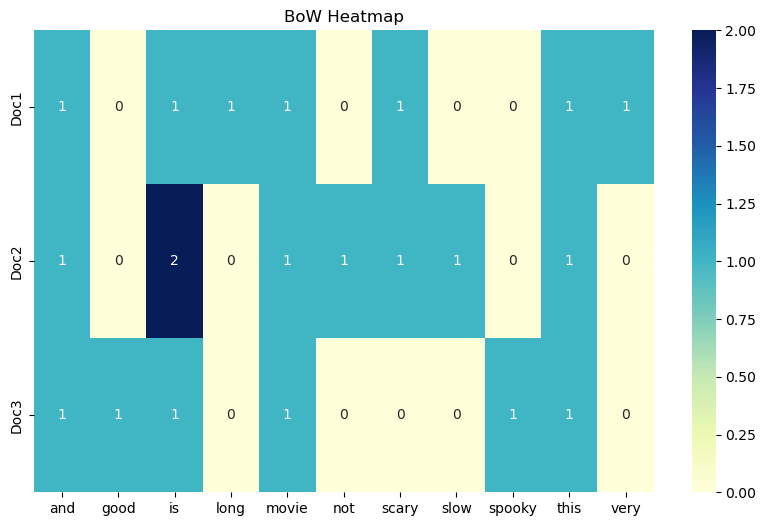

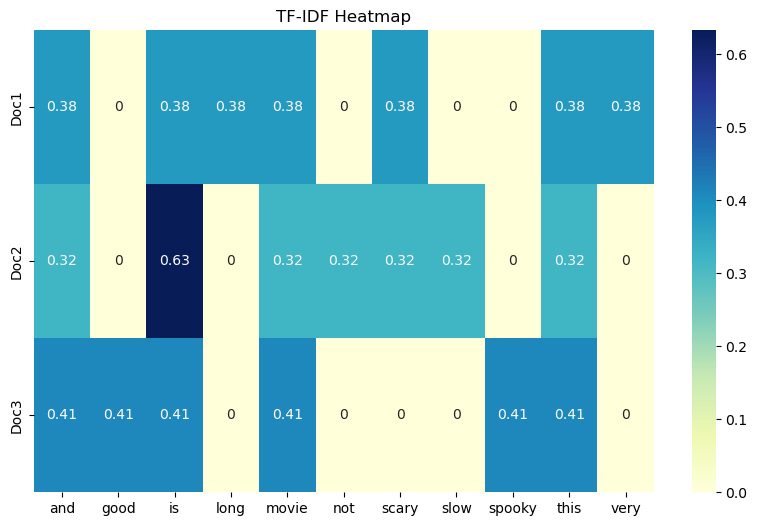

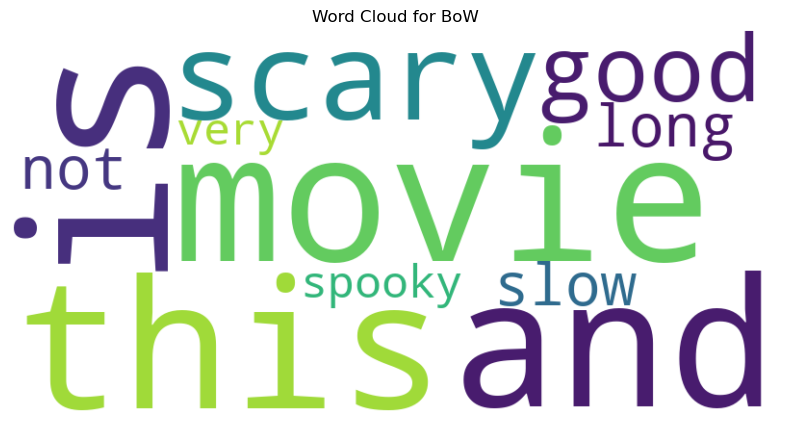

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Function to plot a heatmap
def plot_heatmap(matrix, feature_names, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(matrix, annot=True, cmap="YlGnBu", xticklabels=feature_names, yticklabels=["Doc1", "Doc2", "Doc3"])
    plt.title(title)
    plt.show()

# Plotting heatmaps
plot_heatmap(bow_matrix.toarray(), vectorizer.get_feature_names_out(), "BoW Heatmap")
#plt.figure(figsize=(10, 5))
plot_heatmap(tfidf_matrix.toarray(), tfidf_vectorizer.get_feature_names_out(), "TF-IDF Heatmap")

# Word Cloud for BoW
word_freq = dict(zip(vectorizer.get_feature_names_out(), np.asarray(bow_matrix.sum(axis=0)).ravel()))
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for BoW')
plt.show()